In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Dense, Dropout, Input, Activation
from keras.models import Model, Sequential, load_model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import sklearn

In [ ]:
df=read_csv("drive/MyDrive/Major_project/Major_Project_Data_Collection.csv")
x=df[['Is','Ip','MIp','Ct','Pt','Mt','Pt1','Mtep']]
y=df[['W', 'V', 'T']]
x=np.array(x)
y=np.array(y)
x=sklearn.preprocessing.scale(x,  axis=0)
# y=sklearn.preprocessing.scale(y,  axis=0)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
print(xtrain.shape)
print(xtest.shape)

(71, 8)
(8, 8)


In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3,  activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=500, batch_size=1)
model.summary()

In [ ]:
yhat=model.predict(xtest)
#yhat = search.predict(xtest)
mae = mean_absolute_error(ytest, yhat)
print(mae)

14.899086991449197


In [ ]:
model.save("drive/MyDrive/Major_project/my_model")

INFO:tensorflow:Assets written to: drive/MyDrive/Major_project/my_model/assets


In [ ]:
from pickle import dump

dump(model, open('drive/MyDrive/iisc_data/DNN_1.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://417501c7-8aaa-44eb-8d40-2b454e0b0f44/assets


In [ ]:
from pickle import load

asd = load(open('drive/MyDrive/iisc_data/DNN_1.pkl', 'rb'))

y34 = asd.predict(xtest)
mae = mean_absolute_error(ytest, yhat)
print(mae)

14.899086991449197


In [ ]:
reconstructed_model = load_model("drive/MyDrive/Major_project/my_model")

In [ ]:
yhat = reconstructed_model.predict(xtest)
#yhat = search.predict(xtest)
print(yhat.shape)
mae = mean_absolute_error(ytest, yhat)
print(mae)

(8, 3)
14.503927088777225


In [ ]:
print(ytest)
print(yhat)

[[ 3.6   4.87 35.4 ]
 [ 4.5   3.25 48.7 ]
 [ 7.9   4.27 41.9 ]
 [ 7.5   4.27 35.4 ]
 [ 6.    3.29 29.5 ]
 [ 9.1   5.48 41.9 ]
 [ 8.8   4.43 49.7 ]
 [ 7.2   4.54 35.3 ]]
[[1.1679652 1.416586  1.5275778]
 [2.6291528 3.1984074 3.7378862]
 [3.287365  3.7680037 4.163834 ]
 [1.4739709 1.7853731 1.854827 ]
 [1.6312213 2.2067516 2.2820907]
 [2.2600784 2.9360218 3.0266397]
 [2.6336982 3.4857993 3.851035 ]
 [1.2772417 1.505027  1.5991958]]


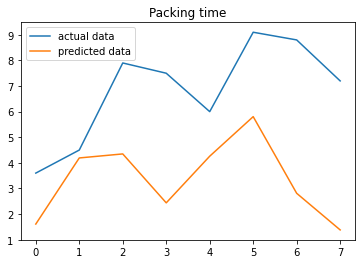

In [ ]:
import matplotlib.pyplot as plt

plt.plot(ytest[:,0], label="actual data")
plt.plot(yhat[:,0], label="predicted data")
plt.title("Packing time")
plt.legend()
plt.show()

# New Section

In [ ]:
from sklearn import svm


In [ ]:
df=read_csv("drive/MyDrive/iisc_data/Exp_ProcessPlanner.csv")
xtrain=df[['Speed', 'Feed', 'DoC', 'WoC', 'Coolant', 'Dir']]
ytrain=df[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
xtrain=sklearn.preprocessing.scale(xtrain,  axis=0)
# y=sklearn.preprocessing.scale(y,  axis=0)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)

(16, 6)
(16, 1)


In [ ]:
df=read_csv("drive/MyDrive/iisc_data/Test_consolidated.csv")
xtest=df[['Speed', 'Feed', 'DoC', 'WoC', 'Coolant', 'Dir']]
ytest=df[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)
xtest=sklearn.preprocessing.scale(xtest,  axis=0)
# y=sklearn.preprocessing.scale(y,  axis=0)

In [ ]:
print(xtest.shape)
print(ytest.shape)

(16, 6)
(16, 1)


In [ ]:
model =svm.SVR()

In [ ]:
model.fit(xtrain, ytrain)
yhat1 = model.predict(xtest)
yhat = yhat1.reshape((yhat1.shape[0], 1))
print(yhat.shape)

# yhat1 = yhat1.reshape(:, 0)
print(ytest.shape)


mae = mean_absolute_error(ytest, yhat)
mse = mean_squared_error(ytest, yhat)
print(mae)
print(mse)

(16, 1)
(16, 1)
0.7467004775279149
1.188460551493515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from joblib import dump, load

In [ ]:
filename = 'drive/MyDrive/iisc_data/as.pkl'
dump(model, filename)

['drive/MyDrive/iisc_data/as.pkl']

In [ ]:
import pickle
pickle.dump(model, open('drive/MyDrive/iisc_data/iri.pkl', 'wb'))